# Before starting with the classification

In [366]:
# import sys
# sys.path.append('/Users/chiaraferrara/Desktop/Unipi/Magistrale/DM 2/dm2_project')

In [367]:
from support.conversion import convert_string_list

In [368]:
import pandas as pd

In [369]:
import os

print("Directory corrente:", os.getcwd())

file_path = 'dm2_dataset_2425_imdb/preprocessed_full.csv'
if os.path.exists(file_path):
    print(f"File trovato: {file_path}")
    df = pd.read_csv(file_path)
else:
    print(f"File non trovato: {file_path}")

Directory corrente: /Users/chiaraferrara/Desktop/Unipi/Magistrale/DM 2/dm2_project
File trovato: dm2_dataset_2425_imdb/preprocessed_full.csv


In [370]:
try:
    with open(file_path, 'r') as f:
        print("File aperto con successo!")
except Exception as e:
    print(f"Errore nell'aprire il file: {e}")

File aperto con successo!


In [371]:
import pandas as pd

try:
    df = pd.read_csv(file_path)
    print(df.head())  # Stampa le prime righe del DataFrame per vedere se il file viene caricato correttamente
except Exception as e:
    print(f"Errore nel leggere il file CSV: {e}")

                            originalTitle  rating  startYear  endYear  \
0                              Carmencita  (5, 6]       1894   1894.0   
1                             Un bon bock  (5, 6]       1892   1892.0   
2                       Chinese Opium Den  (4, 5]       1894   1894.0   
3  Edison Kinetoscopic Record of a Sneeze  (5, 6]       1894   1894.0   
4        L'arrivée d'un train à La Ciotat  (7, 8]       1896   1896.0   

   runtimeMinutes  awardWins  numVotes  worstRating  bestRating  totalImages  \
0             1.0          0      2089            1          10            2   
1            12.0          0       183            1          10            2   
2             1.0          0       195            1          10            1   
3             1.0          1      2237            1          10            3   
4             1.0          0     13115            1          10           12   

   ...  regions_UNK  countryOfOrigin_freq_enc  countryOfOrigin_NA  \
0  ...     

In [372]:
import os

# Usa il percorso relativo senza aggiungere la parte 'dm2_project' due volte


# Chiama la funzione init() con il percorso corretto
df = init(path=file_path)


```new```

In [373]:
# import sys
# import os
# sys.path.append(os.path.abspath("support"))
# from support.preprocessing_pipeline import preprocess_train_test

``` new__ ```

In [374]:
df['averageRating']

0         5.7
1         5.4
2         5.0
3         5.4
4         7.4
         ... 
149526    7.0
149527    6.4
149528    5.6
149529    7.1
149530    8.6
Name: averageRating, Length: 149531, dtype: float64

In [375]:
print(df['averageRating'].unique())

[ 5.7  5.4  5.   7.4  6.1  5.6  5.5  4.2  4.   4.1  4.3  3.   3.8  4.4
  4.5  4.6  5.8  3.3  4.7  6.2  5.2  3.6  3.9  6.6  6.4  5.3  5.9  4.8
  5.1  6.3  6.8  7.3  6.7  3.2  7.2  4.9  6.5  6.   7.6  2.6  7.   3.7
  7.1  8.1  7.7  9.   8.2  7.8  8.7  1.9  2.2  6.9  8.5  7.9  7.5  8.4
  3.4  2.4  3.5  8.8  2.7  8.   2.3  1.8  3.1  2.5  2.9  8.3  1.6  2.8
  8.9  8.6  9.1  9.3  1.7  9.5  2.   9.4  9.8  9.2  1.1  1.5  2.1  9.6
  1.2 10.   9.7  1.3  1.   1.4  9.9]


In [376]:
df['ratingClass'] = pd.cut(
    df['averageRating'],
    bins=[0, 4, 7, 10],
    labels=['low', 'medium', 'high'],
    include_lowest=True
)

In [377]:
rating_df = df[['ratingClass', 'averageRating']]

In [378]:
rating_df.head(40)

,ratingClass,averageRating
0,medium,5.7
1,medium,5.4
2,medium,5.0
3,medium,5.4
4,high,7.4
5,medium,6.1
6,medium,5.6
7,medium,5.5
8,medium,5.5
9,medium,4.2


In [379]:
#I decide to drop the variable averageRating for the moment because it is redundant with the new variable ratingClass
df.drop(columns=['averageRating'], inplace=True)

<Axes: title={'center': 'Distribution of Rating Classes'}, xlabel='Rating Class', ylabel='Count'>

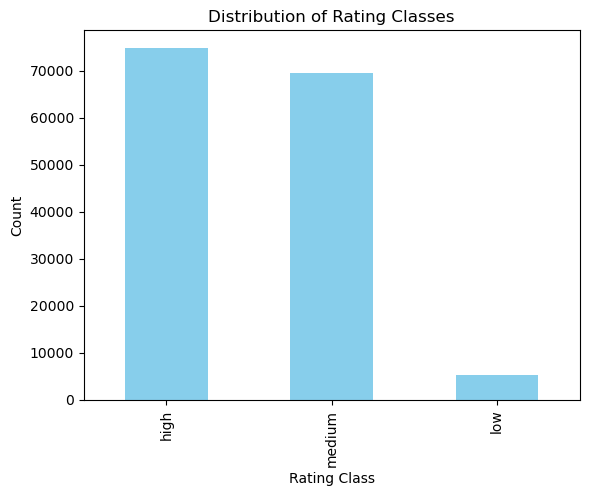

In [380]:
df['ratingClass'].value_counts().plot(kind='bar', title='Distribution of Rating Classes', 
                                      xlabel='Rating Class', ylabel='Count', color='skyblue')

# I start with performing a decision tree without taking into account the imbalancing

In [381]:
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,countryOfOrigin_freq_enc,countryOfOrigin_NA,countryOfOrigin_AF,countryOfOrigin_AS,countryOfOrigin_EU,countryOfOrigin_OC,countryOfOrigin_SA,countryOfOrigin_UNK,reviewsTotal,ratingClass
0,Carmencita,"(5, 6]",1894,1894.0,1.0,0,2089,1,10,2,...,0.399732,1,0,0,0,0,0,0,19,medium
1,Un bon bock,"(5, 6]",1892,1892.0,12.0,0,183,1,10,2,...,0.046115,0,0,0,1,0,0,0,1,medium
2,Chinese Opium Den,"(4, 5]",1894,1894.0,1.0,0,195,1,10,1,...,0.399732,1,0,0,0,0,0,0,0,medium
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1894.0,1.0,1,2237,1,10,3,...,0.399732,1,0,0,0,0,0,0,22,medium
4,L'arrivée d'un train à La Ciotat,"(7, 8]",1896,1896.0,1.0,0,13115,1,10,12,...,0.046115,0,0,0,1,0,0,0,82,high


In [382]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'worstRating', 'bestRating', 'totalImages',
       'totalVideos', 'totalCredits', 'criticReviewsTotal', 'titleType',
       'awardNominationsExcludeWins', 'canHaveEpisodes', 'isRatable',
       'isAdult', 'numRegions', 'userReviewsTotal', 'ratingCount',
       'countryOfOrigin', 'genres', 'castNumber', 'companiesNumber', 'regions',
       'externalLinks', 'writerCredits', 'directorsCredits', 'soundMixes',
       'quotesTotal', 'totalMedia', 'totalNominations', 'deltaCredits',
       'regions_freq_enc', 'regions_EU', 'regions_NA', 'regions_AS',
       'regions_AF', 'regions_OC', 'regions_SA', 'regions_UNK',
       'countryOfOrigin_freq_enc', 'countryOfOrigin_NA', 'countryOfOrigin_AF',
       'countryOfOrigin_AS', 'countryOfOrigin_EU', 'countryOfOrigin_OC',
       'countryOfOrigin_SA', 'countryOfOrigin_UNK', 'reviewsTotal',
       'ratingClass'],
      dtype='object')

In [383]:
df['totalMedia'] = df['totalImages'] + df['totalVideos'] + df['externalLinks'] + df['quotesTotal']
df.drop(['totalVideos', 'totalImages', 'quotesTotal', 'externalLinks'], axis=1, inplace=True)
df.drop(['endYear', 'isAdult', 'bestRating', 'worstRating', 'numVotes', 'originalTitle', 'isRatable', 'rating',
         'countryOfOrigin', 'genres', 'soundMixes', 'regions'], axis=1, inplace=True)
df['totalNominations'] = df['awardWins'] + df['awardNominationsExcludeWins']
df.drop(['awardWins', 'awardNominationsExcludeWins'], axis=1, inplace=True)
df['reviewsTotal'] = df['criticReviewsTotal'] + df['userReviewsTotal']
df.drop(['criticReviewsTotal', 'userReviewsTotal'], axis=1, inplace=True)
# df['deltaCredits'] = df['totalCredits'] - (df['castNumber'] + df['writerCredits'] + df['directorsCredits'])
# df.drop(['totalCredits', 'castNumber', 'writerCredits', 'directorsCredits'], axis=1, inplace=True)
# attenzione a deltaCredits perchè crea 81 inf 


In [384]:
import numpy as np

# List of columns to transform
columns_to_log_transform = [
    'reviewsTotal', 'numRegions', 'ratingCount', 
    'companiesNumber', 'totalCredits', 'castNumber', 
    'writerCredits', 'directorsCredits',
    'totalMedia', 'totalNominations'
]

# Apply log transformation
for col in columns_to_log_transform:
    if col in df.columns:  # Ensure the column exists in the DataFrame
        df[col] = np.log1p(df[col])  # log1p(x) = log(1 + x)

# Verify the transformation
df[columns_to_log_transform].head()

,reviewsTotal,numRegions,ratingCount,companiesNumber,totalCredits,castNumber,writerCredits,directorsCredits,totalMedia,totalNominations
0,2.995732,2.079442,7.646354,1.386294,1.609438,0.693147,0.0,0.693147,2.484907,0.000000
1,0.693147,1.945910,5.214936,0.000000,1.098612,0.000000,0.0,0.693147,1.791759,0.000000
2,0.000000,1.791759,5.278115,0.693147,0.693147,0.000000,0.0,0.693147,1.791759,0.000000
3,3.135494,1.945910,7.713785,1.945910,1.609438,0.693147,0.0,0.693147,2.302585,0.693147
4,4.418841,3.091042,9.481588,1.791759,2.484907,1.945910,0.0,1.098612,3.526361,0.000000


In [385]:
# Perform one-hot encoding for the 'titleType' variable
title_type_encoded = pd.get_dummies(df['titleType'], prefix='titleType')

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, title_type_encoded], axis=1)

# Drop the original 'titleType' column
# df.drop(columns=['titleType'], inplace=True) no perchè la uso per runtimeMinutes

# Display the updated DataFrame
df.head()

,startYear,runtimeMinutes,totalCredits,titleType,canHaveEpisodes,numRegions,ratingCount,castNumber,companiesNumber,writerCredits,...,titleType_movie,titleType_short,titleType_tvEpisode,titleType_tvMiniSeries,titleType_tvMovie,titleType_tvSeries,titleType_tvShort,titleType_tvSpecial,titleType_video,titleType_videoGame
0,1894,1.0,1.609438,short,False,2.079442,7.646354,0.693147,1.386294,0.0,...,False,True,False,False,False,False,False,False,False,False
1,1892,12.0,1.098612,short,False,1.945910,5.214936,0.000000,0.000000,0.0,...,False,True,False,False,False,False,False,False,False,False
2,1894,1.0,0.693147,short,False,1.791759,5.278115,0.000000,0.693147,0.0,...,False,True,False,False,False,False,False,False,False,False
3,1894,1.0,1.609438,short,False,1.945910,7.713785,0.693147,1.945910,0.0,...,False,True,False,False,False,False,False,False,False,False
4,1896,1.0,2.484907,short,False,3.091042,9.481588,1.945910,1.791759,0.0,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
df.columns 

Index(['startYear', 'runtimeMinutes', 'totalCredits', 'titleType',
       'canHaveEpisodes', 'numRegions', 'ratingCount', 'castNumber',
       'companiesNumber', 'writerCredits', 'directorsCredits', 'totalMedia',
       'totalNominations', 'deltaCredits', 'regions_freq_enc', 'regions_EU',
       'regions_NA', 'regions_AS', 'regions_AF', 'regions_OC', 'regions_SA',
       'regions_UNK', 'countryOfOrigin_freq_enc', 'countryOfOrigin_NA',
       'countryOfOrigin_AF', 'countryOfOrigin_AS', 'countryOfOrigin_EU',
       'countryOfOrigin_OC', 'countryOfOrigin_SA', 'countryOfOrigin_UNK',
       'reviewsTotal', 'ratingClass', 'titleType_movie', 'titleType_short',
       'titleType_tvEpisode', 'titleType_tvMiniSeries', 'titleType_tvMovie',
       'titleType_tvSeries', 'titleType_tvShort', 'titleType_tvSpecial',
       'titleType_video', 'titleType_videoGame'],
      dtype='object')

questione runtimeMinutes e altri missing?

In [387]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=['ratingClass'])  # Drop the target variable
y = df['ratingClass']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [388]:
import numpy as np

# Function to impute missing values
def impute_runtime_minutes(group):
    q25, q75 = np.percentile(group.dropna(), [25, 75])  # Calculate 25th and 75th percentiles
    return group.apply(lambda x: np.random.uniform(q25, q75) if np.isnan(x) else x)

# Apply the imputation per titleType
if 'runtimeMinutes' in X_train.columns and 'titleType' in X_train.columns:
    X_train['runtimeMinutes'] = X_train.groupby('titleType')['runtimeMinutes'].transform(impute_runtime_minutes)

# Verify the imputation
X_train['runtimeMinutes'].isnull().sum()  # Should be 0 if all missing values are imputed

0

In [389]:
# Funzione modificata per essere compatibile con transform()
def impute_runtime_minutes_test(group, q25, q75):
    return group.apply(lambda x: np.random.uniform(q25, q75) if np.isnan(x) else x)

# Calcola i percentili nel training set
train_percentiles = X_train.groupby('titleType')['runtimeMinutes'].apply(
    lambda g: np.percentile(g.dropna(), [25, 75])
).to_dict()

# Imputazione nel test set con transform()
def impute_group(group):
    title_type = group.name
    if title_type in train_percentiles:
        q25, q75 = train_percentiles[title_type]
        return group.transform(lambda x: np.random.uniform(q25, q75) if np.isnan(x) else x)
    else:
        return group  # Nessuna imputazione se il tipo non esiste nel training

X_test['runtimeMinutes'] = X_test.groupby('titleType')['runtimeMinutes'].transform(impute_group)


In [390]:
# Drop the 'titleType' column from X_train and X_test
X_train.drop(columns=['titleType'], inplace=True)
X_test.drop(columns=['titleType'], inplace=True)

In [391]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.625973852275387

Classification Report:
               precision    recall  f1-score   support

        high       0.67      0.67      0.67     15188
         low       0.18      0.19      0.18      1035
      medium       0.61      0.62      0.61     13684

    accuracy                           0.63     29907
   macro avg       0.49      0.49      0.49     29907
weighted avg       0.63      0.63      0.63     29907



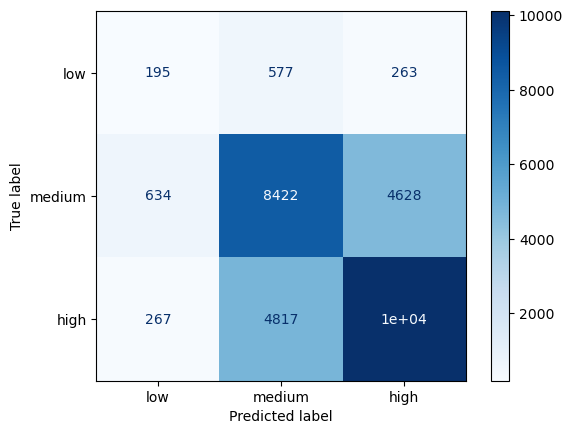

In [392]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap='Blues')

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE


# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6270103989032668
Classification Report:
               precision    recall  f1-score   support

        high       0.68      0.67      0.67     15188
         low       0.16      0.23      0.19      1035
      medium       0.62      0.61      0.61     13684

    accuracy                           0.63     29907
   macro avg       0.49      0.50      0.49     29907
weighted avg       0.63      0.63      0.63     29907



```ADASYN```:

ADASYN generates synthetic samples for the minority class, similar to SMOTE, but focuses more on difficult-to-learn examples (i.e., samples near the decision boundary).
This can sometimes improve the model's performance on imbalanced datasets.

In [394]:
# Ensure required libraries are installed
#%pip install scikit-learn imbalanced-learn

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import ADASYN

# Check class distribution before applying ADASYN
print("Class distribution before ADASYN:")
print(y_train.value_counts())

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42, sampling_strategy='minority')  # Adjust sampling_strategy if needed
try:
	X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
	print("Class distribution after ADASYN:")
	print(pd.Series(y_train_resampled).value_counts())
except ValueError as e:
	print(f"Error with ADASYN: {e}")
	# Handle the error, e.g., by skipping oversampling or using another method



Class distribution before ADASYN:
ratingClass
high      59714
medium    55758
low        4152
Name: count, dtype: int64
Class distribution after ADASYN:
ratingClass
high      59714
low       58971
medium    55758
Name: count, dtype: int64


In [ ]:
# Initialize and train the Decision Tree Classifier
from sklearn.utils.class_weight import compute_class_weight

# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(y_train_resampled),
#     y=y_train_resampled
# )

# weights_dict = dict(zip(np.unique(y_train_resampled), class_weights))

#clf = DecisionTreeClassifier(random_state=42, class_weight= 'balanced')  # Use 'balanced' to automatically adjust weights

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train_resampled, y_train_resampled)


# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6233992041996856
Classification Report:
               precision    recall  f1-score   support

        high       0.68      0.66      0.67     15188
         low       0.15      0.21      0.18      1035
      medium       0.61      0.61      0.61     13684

    accuracy                           0.62     29907
   macro avg       0.48      0.50      0.49     29907
weighted avg       0.63      0.62      0.63     29907



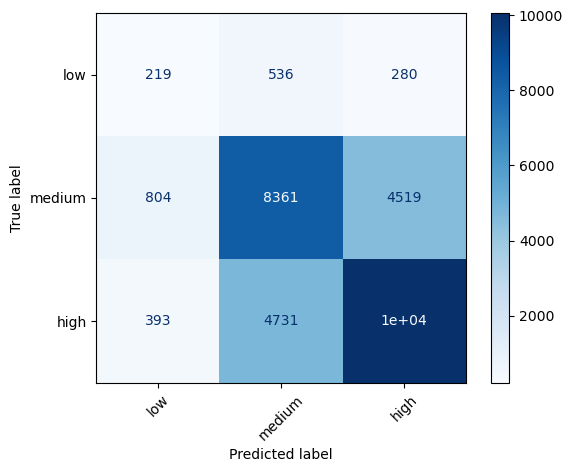

In [396]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap="Blues", xticks_rotation=45)


In [417]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Definizione dei parametri da cercare
param_distributions = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Creazione del modello di Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Impostazione della ricerca randomizzata
random_search = RandomizedSearchCV(
    clf,
    param_distributions=param_distributions,
    n_iter=10,  # Numero di combinazioni casuali da provare
    cv=5,  # Cross-validation con 5 fold
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Allenamento del modello con la ricerca randomizzata
random_search.fit(X_train_resampled, y_train_resampled)

# Migliori parametri trovati
print("Migliori parametri trovati:", random_search.best_params_)

# Modello con i migliori parametri
clf = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklea

Migliori parametri trovati: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': None, 'criterion': 'gini'}


In [419]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6488781890527301
Classification Report:
               precision    recall  f1-score   support

        high       0.70      0.73      0.71     15188
         low       0.16      0.29      0.21      1035
      medium       0.66      0.59      0.62     13684

    accuracy                           0.65     29907
   macro avg       0.51      0.53      0.51     29907
weighted avg       0.66      0.65      0.65     29907



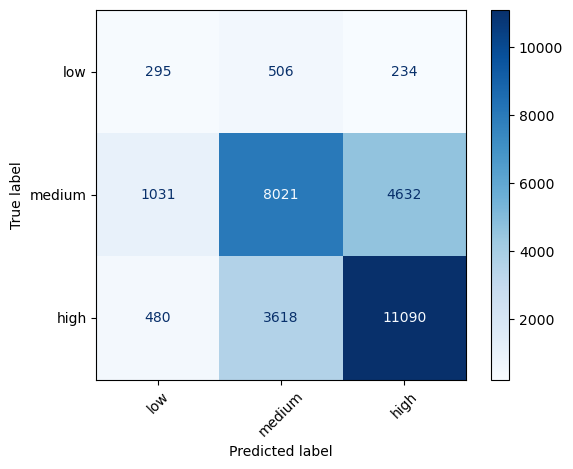

In [432]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium', 'high'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(cmap="Blues", xticks_rotation=45)

In [421]:
print("Class distribution in test set:")
print(y_test.value_counts())

Class distribution in test set:
ratingClass
high      15188
medium    13684
low        1035
Name: count, dtype: int64


In [422]:
probas = clf.predict_proba(X_test)


In [423]:
print(probas)

[[0.33333333 0.58333333 0.08333333]
 [0.5        0.         0.5       ]
 [0.88235294 0.         0.11764706]
 ...
 [0.72727273 0.         0.27272727]
 [1.         0.         0.        ]
 [0.70588235 0.         0.29411765]]


In [424]:
print(clf.classes_)

['high' 'low' 'medium']


In [433]:
threshold_high = 0.8  # soglia per 'high'
threshold_low = 0.1  # soglia per 'low'
threshold_medium = 0.9  # soglia per 'medium'

# Predizione basata sulla probabilità massima
predicted_classes = np.argmax(probas, axis=1)

# Forza la classificazione come 'high', 'low', 'medium' in base alla probabilità
predicted_classes[probas[:, 0] > threshold_high] = 0  # high
predicted_classes[probas[:, 1] > threshold_low] = 1   # low
predicted_classes[probas[:, 2] > threshold_medium] = 2  # medium

In [434]:
for i, prob in enumerate(probas[:10]):
    print(f"Instanza {i + 1}:")
    for j, p in enumerate(prob):
        print(f"  Classe {clf.classes_[j]}: {p}")

Instanza 1:
  Classe high: 0.3333333333333333
  Classe low: 0.5833333333333334
  Classe medium: 0.08333333333333333
Instanza 2:
  Classe high: 0.5
  Classe low: 0.0
  Classe medium: 0.5
Instanza 3:
  Classe high: 0.8823529411764706
  Classe low: 0.0
  Classe medium: 0.11764705882352941
Instanza 4:
  Classe high: 0.5454545454545454
  Classe low: 0.0
  Classe medium: 0.45454545454545453
Instanza 5:
  Classe high: 0.4117647058823529
  Classe low: 0.0
  Classe medium: 0.5882352941176471
Instanza 6:
  Classe high: 0.3684210526315789
  Classe low: 0.0
  Classe medium: 0.631578947368421
Instanza 7:
  Classe high: 0.2
  Classe low: 0.1
  Classe medium: 0.7
Instanza 8:
  Classe high: 0.4444444444444444
  Classe low: 0.2777777777777778
  Classe medium: 0.2777777777777778
Instanza 9:
  Classe high: 0.7727272727272727
  Classe low: 0.0
  Classe medium: 0.22727272727272727
Instanza 10:
  Classe high: 0.5789473684210527
  Classe low: 0.3684210526315789
  Classe medium: 0.05263157894736842


In [435]:
# Per analizzare la distribuzione delle probabilità per tutte le classi
print(np.min(probas, axis=0))  # Minimo per ciascuna classe
print(np.max(probas, axis=0))  # Massimo per ciascuna classe
print(np.mean(probas, axis=0)) # Media per ciascuna classe
print(np.std(probas, axis=0))  # Deviazione standard per ciascuna classe

[0. 0. 0.]
[1. 1. 1.]
[0.48643841 0.07787972 0.43568187]
[0.31593855 0.17431094 0.29338861]


In [436]:
print(type(y_test))
print(type(predicted_classes))
print(set(y_test))  # Mostra tutte le etichette uniche in y_test
print(set(predicted_classes))  # Mostra tutte le etichette uniche in predicted_classes

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
{'low', 'medium', 'high'}
{0, 1, 2}


In [437]:
print(probas[0])

[0.33333333 0.58333333 0.08333333]


In [438]:
# Mappare le etichette di y_test in numeri
label_map = {'high': 0, 'low': 1, 'medium': 2}
y_test_numeric = y_test.map(label_map)

# Calcolare le metriche
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_numeric, predicted_classes))
print(confusion_matrix(y_test_numeric, predicted_classes))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69     15188
           1       0.10      0.55      0.17      1035
           2       0.67      0.48      0.56     13684

    accuracy                           0.58     29907
   macro avg       0.49      0.57      0.47     29907
weighted avg       0.67      0.58      0.61     29907

[[10140  2046  3002]
 [  175   571   289]
 [ 4102  3038  6544]]


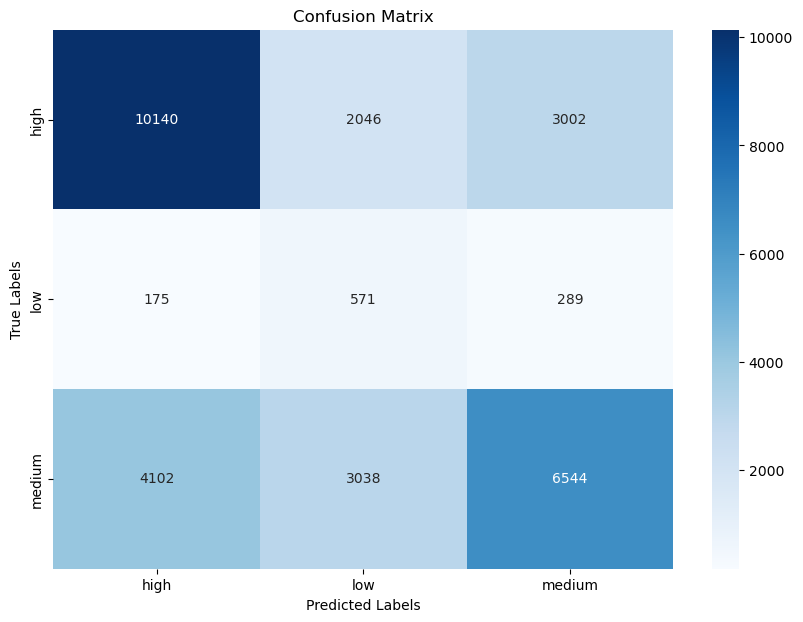

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Creazione della confusion matrix
cm = confusion_matrix(y_test_numeric, predicted_classes)

# Creazione della heatmap per la matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['high', 'low', 'medium'], yticklabels=['high', 'low', 'medium'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()